---
__Analysing Popular Data Science Questions__

---

__Our goal__ 

To use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

__Stack Exchange__

What kind of questions are welcome on this site?

On DSSE's help center's section on questions , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

---

In the help center we learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

Open Data (Dataset requests)
Computational Science (Software packages and algorithms in applied mathematics)


What, other than questions, does DSSE's home subdivide into?

What information is available in each post? Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:

- The posts's score;
- The posts's title;
- The posts's author;
- The posts's body;

For questions only:

- How many users have it on their "
- The last time the question as active;
- How many times the question was viewed;
- Related questions;
- The question's tags;

__Stack Exchange Data Explorer__

Perusing the table names, a few stand out as relevant for our goal:

- Posts
- PostTags
- Tags
- TagSynonyms

__Query Editor__

link: [stack exchange query editor](https://data.stackexchange.com/datascience/query/new])

To get the relevant data we run the following query.

    SELECT Id, CreationDate,
           Score, ViewCount, Tags,
           AnswerCount, FavoriteCount
      FROM posts
     WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2021;

In [1]:
# Dependencies
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Import data and inspect
df_stack = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [3]:
# Null values
for col in df_stack:
    count_na = 0
    for i in df_stack.index:
        if pd.isna(df_stack.loc[i, col]):
            count_na +=1
    print(col, '-', count_na, 'null values')

Id - 0 null values
CreationDate - 0 null values
Score - 0 null values
ViewCount - 0 null values
Tags - 0 null values
AnswerCount - 0 null values
FavoriteCount - 7432 null values


In [4]:
# Clean fav counts
df_stack['FavoriteCount'] = df_stack['FavoriteCount'].fillna(0).astype(int)

# Clean tag data - format as list in cell
df_stack['Tags'] = df_stack['Tags'].str.replace('<', '').str.split('>')
df_stack.sample(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
4539,50874,2019-04-24 18:40:40,0,30,"[machine-learning, python, deep-learning, r, t...",1,0
1880,57895,2019-08-20 16:14:56,0,11,"[machine-learning, machine-learning-model, uns...",0,0
6956,53365,2019-06-06 23:06:28,0,23,"[machine-learning, cnn, decision-trees, ]",1,0
8717,55447,2019-07-10 15:36:48,0,10,"[neural-network, recurrent-neural-net, ]",0,0
5055,51559,2019-05-07 15:23:26,0,10,"[books, markov, ]",0,0
5279,62472,2019-10-31 13:35:14,0,30,"[keras, time-series, dropout, ]",0,0
8372,55087,2019-07-04 18:06:07,0,123,"[machine-learning, visualization, matplotlib, ...",0,0
493,45029,2019-02-04 11:22:49,0,123,"[nlp, anomaly-detection, ngrams, ]",0,0
8810,55784,2019-07-16 14:32:38,0,10,"[feature-engineering, feature-construction, fe...",0,0
125,44621,2019-01-26 23:18:17,0,290,"[r, ]",3,0


---
__ Tags Analysis__


In [5]:
# Most Popular
tag_dict = {}

for tags in df_stack['Tags']:
    for i in tags:
        if i == '': # skip blanks
            pass
        else:
            if i in tag_dict:
                tag_dict[i] += 1
            else:
                tag_dict[i] = 1
            
tag_count = pd.DataFrame.from_dict(tag_dict, orient = 'index').rename(columns = {0: 'Count'}) 
most_used = tag_count.sort_values('Count', ascending = False)

print('Top 10 Tags')
most_used.head(10)

Top 10 Tags


,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


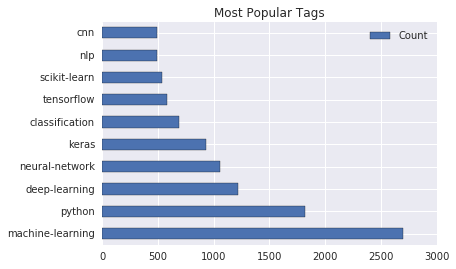

In [6]:
# Visualise resutls
most_used.head(10).plot(kind = 'barh', title = 'Most Popular Tags');

In [7]:
# Most viewed
view_count = dict()

for index, row in df_stack.iterrows():
    for tag in row['Tags']:
        if tag == '':
            pass
        else:
            if tag in view_count:
                view_count[tag] += row['ViewCount']
            else:
                view_count[tag] = row['ViewCount']
            
most_viewed = pd.DataFrame.from_dict(view_count, orient="index").rename(columns={0: "ViewCount"})
most_viewed = most_viewed.sort_values('ViewCount', ascending = False)
most_viewed.head(10)

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


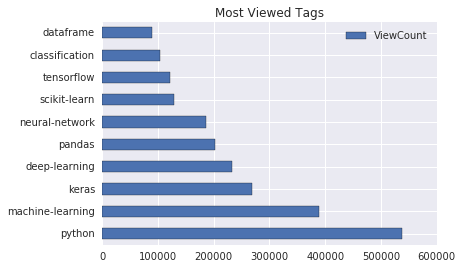

In [8]:
most_viewed.head(10).plot(kind="barh", title = 'Most Viewed Tags');

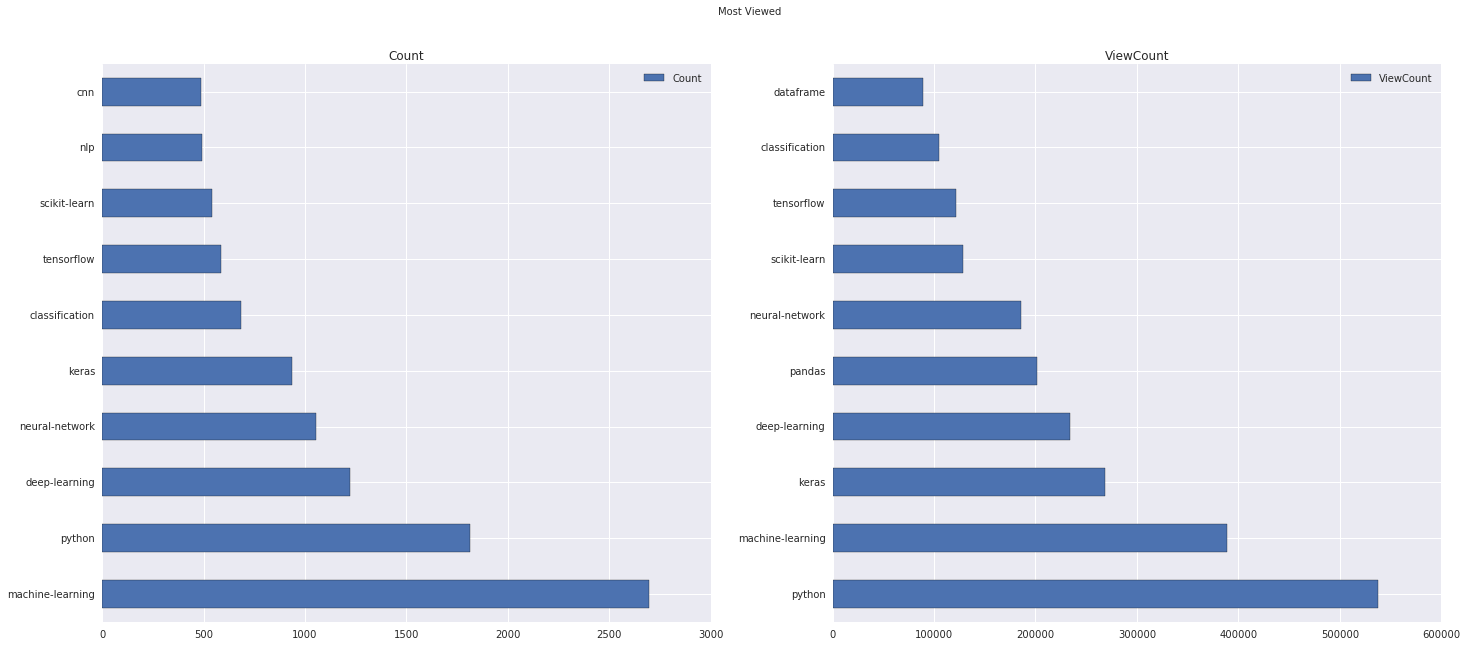

In [9]:
# Combine Plots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches((24, 10))

most_used.head(10).plot(kind="barh", title = 'Most Used', ax=axes[0], subplots=True)
most_viewed.head(10).plot(kind="barh", title = 'Most Viewed', ax=axes[1], subplots=True);

---
__Tag Links__

In [10]:
top_filter = 10
top_used = most_used.head(top_filter)
top_viewed = most_viewed.head(top_filter)

df_tags = pd.DataFrame(index = top_viewed.index, columns = top_used.index).fillna(0)

for tags in df_stack['Tags']:
    for tag in tags:
        if tag in df_tags.index:
            df_tags.loc[tag, :] +=1
        if tag in df_tags.columns:
            df_tags.loc[:, tag] +=1
df_tags

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn
python,4507,3628,3034,2869,2749,2499,2398,2354,2307,2303
machine-learning,5386,4507,3913,3748,3628,3378,3277,3233,3186,3182
keras,3628,2749,2155,1990,1870,1620,1519,1475,1428,1424
deep-learning,3913,3034,2440,2275,2155,1905,1804,1760,1713,1709
pandas,3047,2168,1574,1409,1289,1039,938,894,847,843
neural-network,3748,2869,2275,2110,1990,1740,1639,1595,1548,1544
scikit-learn,3233,2354,1760,1595,1475,1225,1124,1080,1033,1029
tensorflow,3277,2398,1804,1639,1519,1269,1168,1124,1077,1073
classification,3378,2499,1905,1740,1620,1370,1269,1225,1178,1174
dataframe,2774,1895,1301,1136,1016,766,665,621,574,570


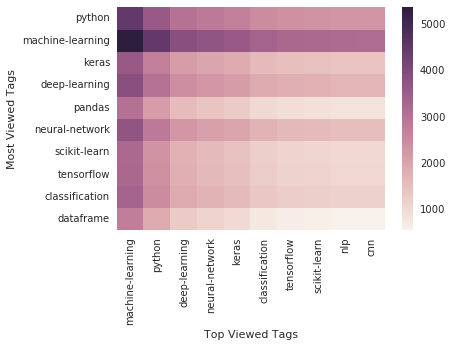

In [11]:
plt.figure()
sns.heatmap(df_tags).set(xlabel = 'Top Viewed Tags', ylabel = 'Most Viewed Tags')
plt.show();

Keras, scikit-learn, TensorFlow are all Python libraries used for Machine Learning.

Most of the top tags are all intimately related with one central machine learning theme: deep learning (neural networks). 

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

    SELECT Id, CreationDate, Tags
      FROM posts
     WHERE PostTypeId = 1;

In [12]:
# Import and clean all-questions dataset
df_qs = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
df_qs['Tags'] = df_qs['Tags'].str.replace('<', '').str.split('>')

df_qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [13]:
df_qs.sample(10)

,Id,CreationDate,Tags
13281,30695,2018-04-23 15:20:04,"[machine-learning, predictive-modeling, regres..."
17507,32396,2018-05-30 13:36:08,"[classification, orange, machine-learning-mode..."
11794,61534,2019-10-10 04:48:55,"[scikit-learn, pipelines, ]"
16621,32016,2018-05-23 06:04:59,"[naive-bayes-classifier, ]"
8971,18996,2017-05-16 07:42:27,"[python, regression, linear-regression, correl..."
7636,58662,2019-09-04 11:35:28,"[machine-learning, python, multiclass-classifi..."
12688,43356,2018-12-31 19:46:42,"[recommender-system, matrix, ]"
17389,63785,2019-11-26 10:21:56,"[machine-learning, data, preprocessing, data-s..."
4115,26206,2018-01-02 15:21:36,"[machine-learning, python, k-means, ]"
7440,27777,2018-02-14 02:21:47,"[machine-learning, deep-learning, keras, convn..."


In [14]:
# One hot encode for deep learning content
def deep_learning(tags):
    for tag in tags:
        if tag in ['pytorch','lstm', 'cnn', 'scikit-learn', 'tensorflow',
                   'keras', 'neural-network', 'deep-learning', 'gan', 
                   'reinforcement-learning', 'rnn', 'autoencoder']:
            return 1
    return 0

df_qs['DeepLearning'] = df_qs['Tags'].apply(deep_learning)
df_qs[df_qs['DeepLearning'] > 0].sample(10)

,Id,CreationDate,Tags,DeepLearning
14169,22476,2017-08-22 12:52:49,"[reinforcement-learning, feature-scaling, ]",1
19833,55409,2019-07-10 08:11:43,"[machine-learning, deep-learning, perceptron, ]",1
10969,29507,2018-03-25 09:42:07,"[machine-learning, neural-network, deep-learni...",1
6824,58352,2019-08-28 23:48:25,"[machine-learning, neural-network, recurrent-n...",1
20308,65688,2020-01-01 16:17:40,"[machine-learning, neural-network, deep-learni...",1
782,45739,2019-02-18 05:53:07,"[deep-learning, data, ]",1
10540,51043,2019-04-27 23:02:07,"[python, keras, scikit-learn, tensorflow, stac...",1
10352,60862,2019-09-27 04:55:28,"[machine-learning, python, scikit-learn, norma...",1
7284,18088,2017-04-03 19:38:20,"[machine-learning, neural-network, keras, thea...",1
19455,64999,2019-12-17 14:30:02,"[python, keras, lstm, autoencoder, implementat...",1


In [15]:
# Analyse quarterly trends
def get_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(
        ((datetime.month - 1) // 3) + 1
                 )
     
    return "{y}Q{q}".format(y = year, q = quarter)

df_qs["Quarter"] = df_qs["CreationDate"].apply(get_quarter)

# Drop incomplete data from 2020
df_qs = df_qs[df_qs["CreationDate"].dt.year < 2020]

In [16]:
# Summarise the data
df_quart = df_qs.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
df_quart.columns = ['DL_Questions', 'TotalQuestions']

df_quart["DL_Rate"] = df_quart["DL_Questions"] / df_quart["TotalQuestions"]    
df_quart = df_quart.reset_index()

df_quart.sample(10)

,Quarter,DL_Questions,TotalQuestions,DL_Rate
10,16Q4,189,527,0.358634
17,18Q3,743,1512,0.491402
13,17Q3,265,714,0.371148
14,17Q4,382,898,0.425390
9,16Q3,165,585,0.282051
16,18Q2,605,1448,0.417818
1,14Q3,15,189,0.079365
18,18Q4,557,1294,0.430448
0,14Q2,9,157,0.057325
2,14Q4,21,216,0.097222


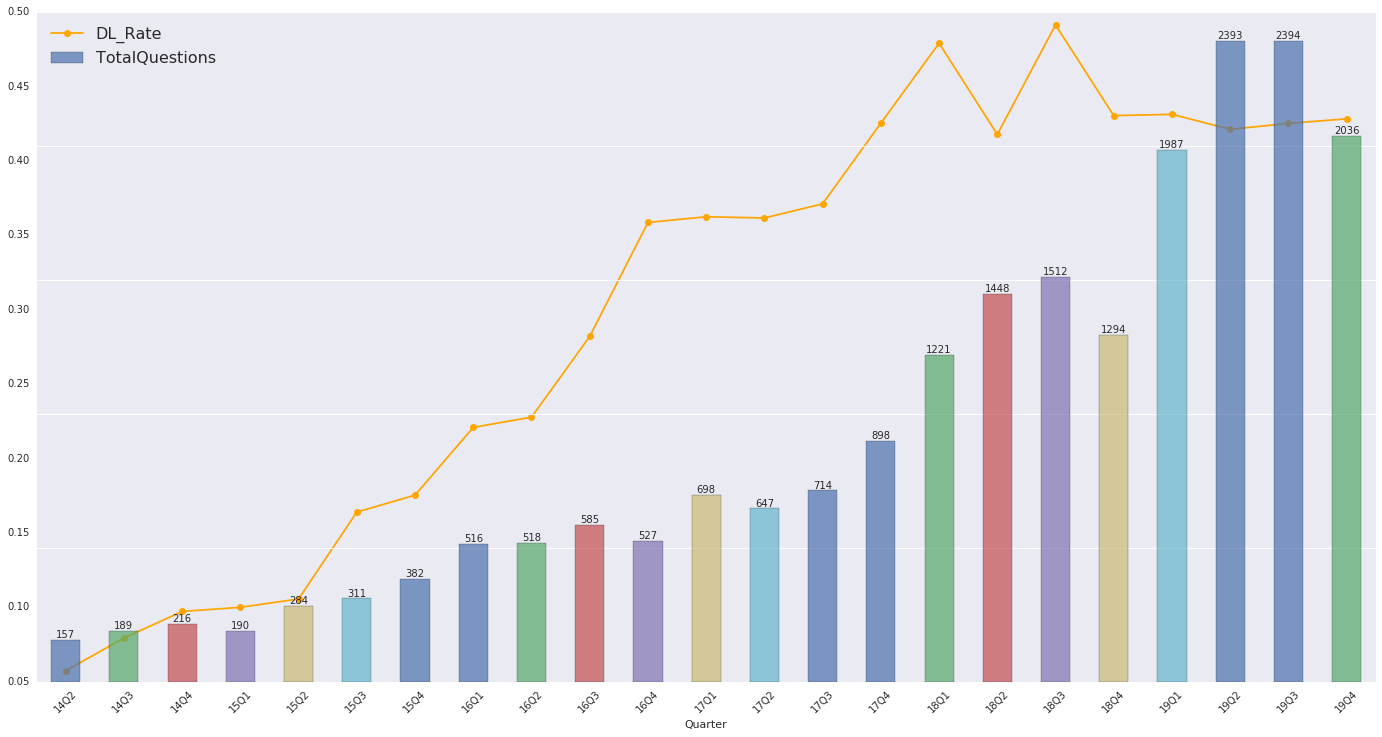

In [17]:
# Visualise
ax1 = df_quart.plot(x = 'Quarter', y = 'DL_Rate', kind = 'line', linestyle = '-', 
                    marker = 'o', color = 'orange',figsize = (24,12))

ax2 = df_quart.plot(x = 'Quarter', y = 'TotalQuestions', kind = 'bar', 
                    ax = ax1, secondary_y = True, alpha = 0.7, rot = 45)

for i, t in df_quart['TotalQuestions'].iteritems():
    ax2.text(i, t, str(t), ha = 'center', va = 'bottom')

xlims = ax1.get_xlim()
ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(handles = handles1 + handles2, labels = labels1 + labels2, 
           loc = 'upper left', prop = {'size': 16})

for ax in (ax1, ax2):
    for where in ('top', 'right'):
        ax.spines[where].set_visible(False)
        ax.tick_params(right = False, labelright = False)

__Final Remark__

Machine Learning, particulaly deep learning has had high-growth since the start of DSSE - and it looks like it is perhaps slowing. 

There is no evidence to suggest that interest in deep learning is decreasing. 

I maintain the proposition that creating machine learning content, specifically deep learning, based on analysis of this dataset.